### Y Layer on DBN Data
Time to analyze how our model behaves using activation data from a Deep Belief Network (DBN).

- Each file corresponds to one layer:
    * Layer 2: 250 nodes
    * Layer 3: 120 nodes
    * Layer 4: 60 nodes

- All layers have 184,800 activation samples (rows), allowing consistent comparisons.

🧪 Trial 1: Ordered Node Selection
Select the first {10, 30, 60} nodes from each layer. Use n samples (time points) out of the 184,800.

Two cases:
* Case 1: Order matters  
    - Compute a → taking samples in original order (0 to n)
    - Compute Y layer
    - Compute derivatives of Y
    - Plot phase space of Y

* Case 2: Order does not matter
    - Compute a → taking n samples in random order
    - Repeat the same computations as above.

🧪 Trial 2: Random Node Selection
Randomly select {10, 30, 60} nodes from each layer. Use n samples out of 184,800.

Two cases (same as above):
* Case 1: Ordered sampling
* Case 2: Random sampling


Note:
Intuitively, Layer 4 is better trained than Layer 3, which is better than Layer 2.
This motivates a systematic analysis.

Leave open key questions for later exploration.


### DATA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Layer 2
ruta_layer2 = "activation_layer2.txt"  
with open(ruta_layer2, "r") as f:
    # Rewrite data in a list
    data_layer2 = [list(map(int, line.strip().split())) for line in f]
# Rewrite as numpy array
X_layer2 = np.array(data_layer2)
print("Layer 2 loaded:", X_layer2.shape)  

# Layer 3
ruta_layer3 = "activation_layer3.txt"  
with open(ruta_layer3, "r") as f:
    # Rewrite data in a list
    data_layer3 = [list(map(int, line.strip().split())) for line in f]
# Rewrite as numpy array
X_layer3 = np.array(data_layer3)
print("Layer 3 loaded:", X_layer3.shape)  

# Layer 4
ruta_layer4 = "activation_layer4.txt"  
with open(ruta_layer4, "r") as f:
    # Rewrite data in a list
    data_layer4 = [list(map(int, line.strip().split())) for line in f]
# Rewrite as numpy array
X_layer4 = np.array(data_layer4)
print("Layer 4 loaded:", X_layer4.shape)  

Layer 2 loaded: (184800, 250)
Layer 3 loaded: (184800, 120)
Layer 4 loaded: (184800, 60)


### Divide data in Trials and cases

#### CASE ORDER SAMPLING MATTERS

In [9]:
# Parameters
selected_nodes = [10, 20, 30, 40, 50, 60]  # Number of nodes to select
n_samples = 5000                          # Number of samples
start_index = 10_000                      # Starting point for ordered sampling

# Trial 1: Ordered sampling (case where order matters)
sample_indices_ordered = np.arange(start_index, start_index + n_samples)
print(f"Sample indices (ordered): {sample_indices_ordered[:5]} ... {sample_indices_ordered[-5:]}")

cut_ordered_temporal = {}
for n in selected_nodes:
    cut_ordered_temporal[f"L2_{n}"] = X_layer2[sample_indices_ordered, :n]
    cut_ordered_temporal[f"L3_{n}"] = X_layer3[sample_indices_ordered, :n]
    cut_ordered_temporal[f"L4_{n}"] = X_layer4[sample_indices_ordered, :n]
    print(f"[Trial 1 - Ordered temporal] Nodes {n}: L2, L3, L4 -> shape: {cut_ordered_temporal[f'L2_{n}'].shape}")

# Trial 2: Random nodes
cut_random_temporal = {}
for n in selected_nodes:
    node_indices_L2 = np.sort(np.random.choice(X_layer2.shape[1], size=n, replace=False))
    node_indices_L3 = np.sort(np.random.choice(X_layer3.shape[1], size=n, replace=False))
    node_indices_L4 = np.sort(np.random.choice(X_layer4.shape[1], size=n, replace=False))

    cut_random_temporal[f"L2_{n}"] = X_layer2[sample_indices_ordered][:, node_indices_L2]
    cut_random_temporal[f"L3_{n}"] = X_layer3[sample_indices_ordered][:, node_indices_L3]
    cut_random_temporal[f"L4_{n}"] = X_layer4[sample_indices_ordered][:, node_indices_L4]
    print(f"[Trial 2] Random nodes {n}: L2, L3, L4 -> shape: {cut_random_temporal[f'L2_{n}'].shape}")

#Example
#print(cut_ordered["L2_10"])

Sample indices (ordered): [10000 10001 10002 10003 10004] ... [14995 14996 14997 14998 14999]
[Trial 1 - Ordered temporal] Nodes 10: L2, L3, L4 -> shape: (5000, 10)
[Trial 1 - Ordered temporal] Nodes 20: L2, L3, L4 -> shape: (5000, 20)
[Trial 1 - Ordered temporal] Nodes 30: L2, L3, L4 -> shape: (5000, 30)
[Trial 1 - Ordered temporal] Nodes 40: L2, L3, L4 -> shape: (5000, 40)
[Trial 1 - Ordered temporal] Nodes 50: L2, L3, L4 -> shape: (5000, 50)
[Trial 1 - Ordered temporal] Nodes 60: L2, L3, L4 -> shape: (5000, 60)
[Trial 2] Random nodes 10: L2, L3, L4 -> shape: (5000, 10)
[Trial 2] Random nodes 20: L2, L3, L4 -> shape: (5000, 20)
[Trial 2] Random nodes 30: L2, L3, L4 -> shape: (5000, 30)
[Trial 2] Random nodes 40: L2, L3, L4 -> shape: (5000, 40)
[Trial 2] Random nodes 50: L2, L3, L4 -> shape: (5000, 50)
[Trial 2] Random nodes 60: L2, L3, L4 -> shape: (5000, 60)


#### CASE RANDOM ORDER OF SAMPLING

In [10]:
#parameters
selected_nodes = [10, 20, 30, 40, 50, 60]  # número de nodos a tomar
n_samples = 5000               # número de muestras
np.random.seed(42)


# Índices de muestras compartidos entre todos
sample_indices = np.sort(np.random.choice(X_layer2.shape[0], size=n_samples, replace=False))
print(sample_indices)
# Trial 1: Ordered nodes
cut_ordered = {}
for n in selected_nodes:
    cut_ordered[f"L2_{n}"] = X_layer2[sample_indices, :n]
    cut_ordered[f"L3_{n}"] = X_layer3[sample_indices, :n]
    cut_ordered[f"L4_{n}"] = X_layer4[sample_indices, :n]
    print(f"[Trial 1] Ordered nodes {n}: L2, L3, L4 -> shape: {cut_ordered[f'L2_{n}'].shape}")

# Trial 2: Random nodes
cut_random = {}
for n in selected_nodes:
    node_indices_L2 = np.sort(np.random.choice(X_layer2.shape[1], size=n, replace=False))
    node_indices_L3 = np.sort(np.random.choice(X_layer3.shape[1], size=n, replace=False))
    node_indices_L4 = np.sort(np.random.choice(X_layer4.shape[1], size=n, replace=False))

    cut_random[f"L2_{n}"] = X_layer2[sample_indices][:, node_indices_L2]
    cut_random[f"L3_{n}"] = X_layer3[sample_indices][:, node_indices_L3]
    cut_random[f"L4_{n}"] = X_layer4[sample_indices][:, node_indices_L4]
    print(f"[Trial 2] Random nodes {n}: L2, L3, L4 -> shape: {cut_random[f'L2_{n}'].shape}")

#Example
#print(cut_ordered["L2_10"])

[    12     34     35 ... 184567 184578 184604]
[Trial 1] Ordered nodes 10: L2, L3, L4 -> shape: (5000, 10)
[Trial 1] Ordered nodes 20: L2, L3, L4 -> shape: (5000, 20)
[Trial 1] Ordered nodes 30: L2, L3, L4 -> shape: (5000, 30)
[Trial 1] Ordered nodes 40: L2, L3, L4 -> shape: (5000, 40)
[Trial 1] Ordered nodes 50: L2, L3, L4 -> shape: (5000, 50)
[Trial 1] Ordered nodes 60: L2, L3, L4 -> shape: (5000, 60)
[Trial 2] Random nodes 10: L2, L3, L4 -> shape: (5000, 10)
[Trial 2] Random nodes 20: L2, L3, L4 -> shape: (5000, 20)
[Trial 2] Random nodes 30: L2, L3, L4 -> shape: (5000, 30)
[Trial 2] Random nodes 40: L2, L3, L4 -> shape: (5000, 40)
[Trial 2] Random nodes 50: L2, L3, L4 -> shape: (5000, 50)
[Trial 2] Random nodes 60: L2, L3, L4 -> shape: (5000, 60)


#### Layer a

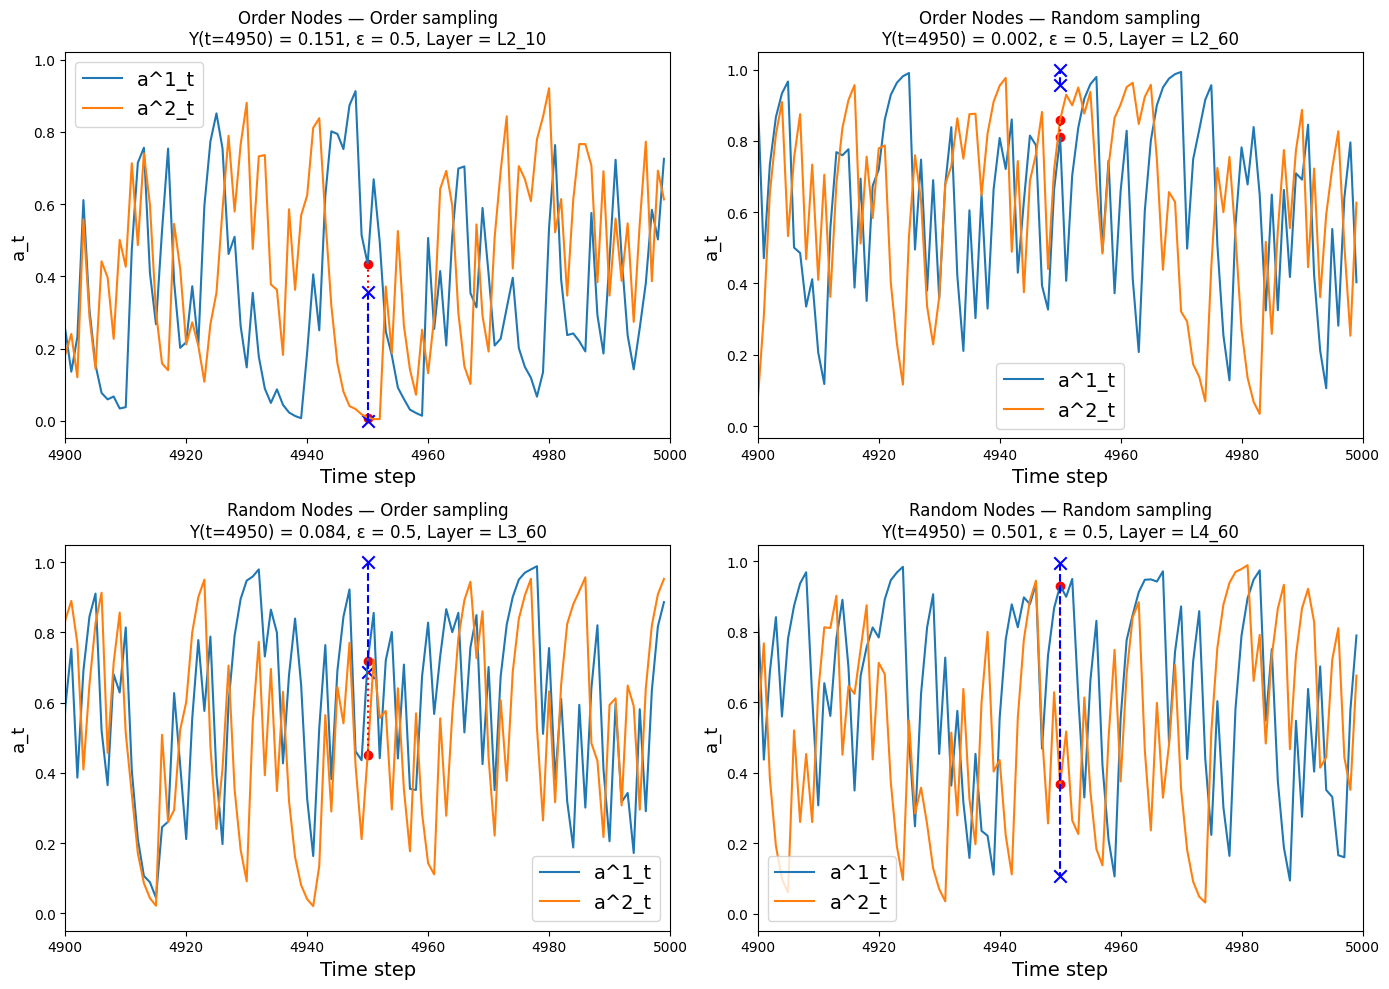

In [117]:
def activation(z, func="sigmoid"):
    """
    Funciones de activación: step, sigmoid, tanh, relu.
    """
    if func == "step":
        return np.where(z >= 0, 1.0, -1.0)
    elif func == "sigmoid":
        return 1 / (1 + np.exp(-z))
    elif func == "tanh":
        return np.tanh(z)
    elif func == "relu":
        return np.maximum(0.0, z)
    else:
        raise ValueError(f"Función '{func}' no reconocida")

def simulate_activation_from_data(X, J=2, eps=0.5, func="sigmoid"):
    """
    Simula la dinámica de activación sobre datos binarios reales.
    - X: datos binarios (T, n)
    - J: número de capas
    - eps: parámetro de memoria
    - func: función de activación (sigmoid por defecto)
    Devuelve: A (T, J), z (T, J), sigma(z)
    """
    T, n = X.shape
    X_mapped = 2 * X - 1  # {0,1} -> {-1,+1}
    
    A = np.zeros((T, J))
    Z = np.zeros((T, J))
    Sigma = np.zeros((T, J))
    
    W = np.random.normal(0, 1, size=(J, n))  # pesos aleatorios
    a_vals = np.zeros(J)

    for t in range(T):
        for j in range(J):
            z = W[j] @ X_mapped[t]
            sigma_out = activation(z, func=func)
            a_vals[j] = (1 - eps) * a_vals[j] + eps * sigma_out
            A[t, j] = a_vals[j]
            Z[t, j] = z
            Sigma[t, j] = sigma_out
    return A, Z, Sigma


def plot_activation_case(X_data, t_star, eps, title, ax, func="sigmoid", layer="L2_10"):
    """
    Simula y grafica la activación para un conjunto de datos X_data.
    """
    A_data, Z_data, Sigma_data = simulate_activation_from_data(X_data, J=2, eps=eps, func=func)
    sig1, sig2 = Sigma_data[t_star, 0], Sigma_data[t_star, 1]

    ax.plot(A_data[:, 0], label='a^1_t', color='tab:blue')
    ax.plot(A_data[:, 1], label='a^2_t', color='tab:orange')
    ax.scatter([t_star], [A_data[t_star, 0]], color='red')
    ax.scatter([t_star], [A_data[t_star, 1]], color='red')
    ax.scatter([t_star], [sig1], color='blue', marker='x', s=80)
    ax.scatter([t_star], [sig2], color='blue', marker='x', s=80)
    ax.plot([t_star, t_star], [A_data[t_star, 0], A_data[t_star, 1]], color='red', linestyle=':')
    ax.plot([t_star, t_star], [sig1, sig2], color='blue', linestyle='--')
    ax.set_xlim(t_star - 50, t_star + 50)
    ax.set_xlabel("Time step", fontsize=14)
    ax.set_ylabel("a_t", fontsize=13)

    # Compute Y(t)
    delta_a = A_data[t_star, 0] - A_data[t_star, 1]
    delta_sigma = sig1 - sig2
    sra = delta_a * delta_sigma
    ax.set_title(f"{title}\nY(t={t_star}) = {sra:.3f}, ε = {eps}, Layer = {layer}")
    ax.legend(fontsize=14)

# Parámetros
t_max = n_samples  # número total de pasos a usar
t_star = 4950      # instante central a evaluar
eps = 0.5

# Crear panel 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Ejecutar 4 casos
plot_activation_case(cut_ordered_temporal["L2_10"][:t_max], t_star, eps,
                     "Order Nodes — Order sampling", axs[0], layer="L2_10")

plot_activation_case(cut_ordered["L2_60"][:t_max], t_star, eps,
                     "Order Nodes — Random sampling", axs[1], layer="L2_60")

plot_activation_case(cut_random_temporal["L3_60"][:t_max], t_star, eps,
                     "Random Nodes — Order sampling", axs[2], layer="L3_60")

plot_activation_case(cut_random["L4_60"][:t_max], t_star, eps,
                     "Random Nodes — Random sampling", axs[3], layer="L4_60")

plt.tight_layout()
plt.show()


#### Layer Y vs Eps

Cada Y viene de un sample dentro de "L4_60", el corte que hacemos es temporal en a y temporal en Y, J son solo copias pero de la misma distribucion s_i(t)

Al final quiero un Y score vs eps, como hacerlo?

### CASE ORDER NODES, ORDER SAMPLING ---->


In [ ]:
def Y_layer(A_t, sigma_t):
    J = A_t.size
    score = 0.0
    num_pairs = J*(J-1)/2
    for j in range(J):
        for j_prime in range(j+1, J):
            score += (A_t[j]-A_t[j_prime])*(sigma_t[j]-sigma_t[j_prime])
    return score/num_pairs

# NAME OF THE VARIABLES:
# cut_ordered_temporal: order nodes, order sampling
# cut_ordered: order nodes, random sampling
# cut_random_temporal: random nodes, order sampling
# cut_random: random nodes, random sampling

t_star = 4950     
J = 100
eps_values = np.linspace(0.01, 1.0, 50)

Y_ON_OS_L2_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L2_10"], J, eps, func="sigmoid")
    Y_ON_OS_L2_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L2_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L2_30"], J, eps, func="sigmoid")
    Y_ON_OS_L2_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L2_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L2_60"], J, eps, func="sigmoid")
    Y_ON_OS_L2_60.append(Y_layer(A[t_star], Sigma[t_star]))
    
Y_ON_OS_L3_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L3_10"], J, eps, func="sigmoid")
    Y_ON_OS_L3_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L3_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L3_30"], J, eps, func="sigmoid")
    Y_ON_OS_L3_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L3_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L3_60"], J, eps, func="sigmoid")
    Y_ON_OS_L3_60.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L4_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L4_10"], J, eps, func="sigmoid")
    Y_ON_OS_L4_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L4_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L4_30"], J, eps, func="sigmoid")
    Y_ON_OS_L4_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_OS_L4_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered_temporal["L4_60"], J, eps, func="sigmoid")
    Y_ON_OS_L4_60.append(Y_layer(A[t_star], Sigma[t_star]))

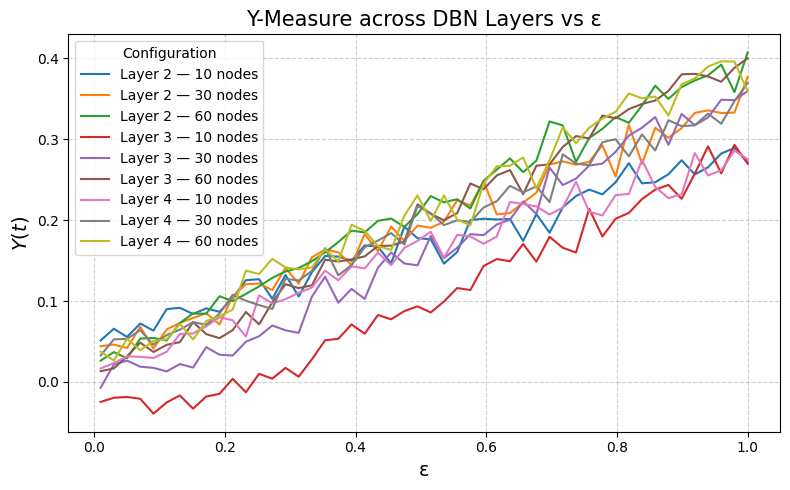

In [73]:
plt.figure(figsize=(8, 5))

# Curvas por capa y número de nodos
plt.plot(eps_values, Y_ON_OS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, Y_ON_OS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, Y_ON_OS_L2_60, label="Layer 2 — 60 nodes")

plt.plot(eps_values, Y_ON_OS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, Y_ON_OS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, Y_ON_OS_L3_60, label="Layer 3 — 60 nodes")

plt.plot(eps_values, Y_ON_OS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, Y_ON_OS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, Y_ON_OS_L4_60, label="Layer 4 — 60 nodes")

# Etiquetas y título
plt.title("Y-Measure across DBN Layers vs ε", fontsize=15)
plt.xlabel("ε", fontsize=14)
plt.ylabel(r"$Y(t)$", fontsize=14)

# Estética
plt.legend(title="Configuration", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### CASE ORDER NODES, RANDOM SAMPLING --------------------------->

In [74]:
def Y_layer(A_t, sigma_t):
    J = A_t.size
    score = 0.0
    num_pairs = J*(J-1)/2
    for j in range(J):
        for j_prime in range(j+1, J):
            score += (A_t[j]-A_t[j_prime])*(sigma_t[j]-sigma_t[j_prime])
    return score/num_pairs


# CASE ORDER NODES, ORDER SAMPLING --------------------------->
t_star = 4950     
J = 100
eps_values = np.linspace(0.01, 1.0, 50)

Y_ON_RS_L2_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L2_10"], J, eps, func="sigmoid")
    Y_ON_RS_L2_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L2_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L2_30"], J, eps, func="sigmoid")
    Y_ON_RS_L2_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L2_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L2_60"], J, eps, func="sigmoid")
    Y_ON_RS_L2_60.append(Y_layer(A[t_star], Sigma[t_star]))
    
Y_ON_RS_L3_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L3_10"], J, eps, func="sigmoid")
    Y_ON_RS_L3_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L3_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L3_30"], J, eps, func="sigmoid")
    Y_ON_RS_L3_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L3_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L3_60"], J, eps, func="sigmoid")
    Y_ON_RS_L3_60.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L4_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L4_10"], J, eps, func="sigmoid")
    Y_ON_RS_L4_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L4_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L4_30"], J, eps, func="sigmoid")
    Y_ON_RS_L4_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_ON_RS_L4_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_ordered["L4_60"], J, eps, func="sigmoid")
    Y_ON_RS_L4_60.append(Y_layer(A[t_star], Sigma[t_star]))



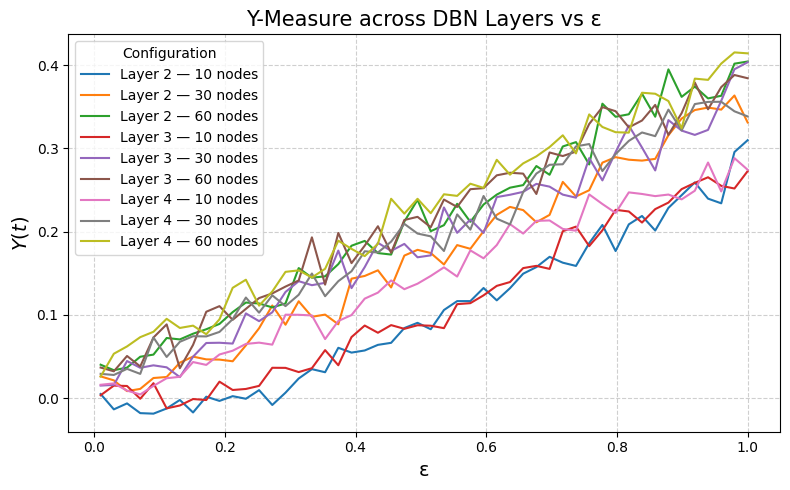

In [75]:
plt.figure(figsize=(8, 5))

# Curvas por capa y número de nodos
plt.plot(eps_values, Y_ON_RS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, Y_ON_RS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, Y_ON_RS_L2_60, label="Layer 2 — 60 nodes")

plt.plot(eps_values, Y_ON_RS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, Y_ON_RS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, Y_ON_RS_L3_60, label="Layer 3 — 60 nodes")

plt.plot(eps_values, Y_ON_RS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, Y_ON_RS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, Y_ON_RS_L4_60, label="Layer 4 — 60 nodes")

# Etiquetas y título
plt.title("Y-Measure across DBN Layers vs ε", fontsize=15)
plt.xlabel("ε", fontsize=14)
plt.ylabel(r"$Y(t)$", fontsize=14)

# Estética
plt.legend(title="Configuration", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### CASE RANDOM NODES, ORDER SAMPLING --------------------------->

In [76]:
def Y_layer(A_t, sigma_t):
    J = A_t.size
    score = 0.0
    num_pairs = J*(J-1)/2
    for j in range(J):
        for j_prime in range(j+1, J):
            score += (A_t[j]-A_t[j_prime])*(sigma_t[j]-sigma_t[j_prime])
    return score/num_pairs


# CASE ORDER NODES, ORDER SAMPLING --------------------------->
t_star = 4950     
J = 100
eps_values = np.linspace(0.01, 1.0, 50)

Y_RN_OS_L2_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L2_10"], J, eps, func="sigmoid")
    Y_RN_OS_L2_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L2_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L2_30"], J, eps, func="sigmoid")
    Y_RN_OS_L2_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L2_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L2_60"], J, eps, func="sigmoid")
    Y_RN_OS_L2_60.append(Y_layer(A[t_star], Sigma[t_star]))
    
Y_RN_OS_L3_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L3_10"], J, eps, func="sigmoid")
    Y_RN_OS_L3_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L3_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L3_30"], J, eps, func="sigmoid")
    Y_RN_OS_L3_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L3_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L3_60"], J, eps, func="sigmoid")
    Y_RN_OS_L3_60.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L4_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L4_10"], J, eps, func="sigmoid")
    Y_RN_OS_L4_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L4_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L4_30"], J, eps, func="sigmoid")
    Y_RN_OS_L4_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_OS_L4_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random_temporal["L4_60"], J, eps, func="sigmoid")
    Y_RN_OS_L4_60.append(Y_layer(A[t_star], Sigma[t_star]))

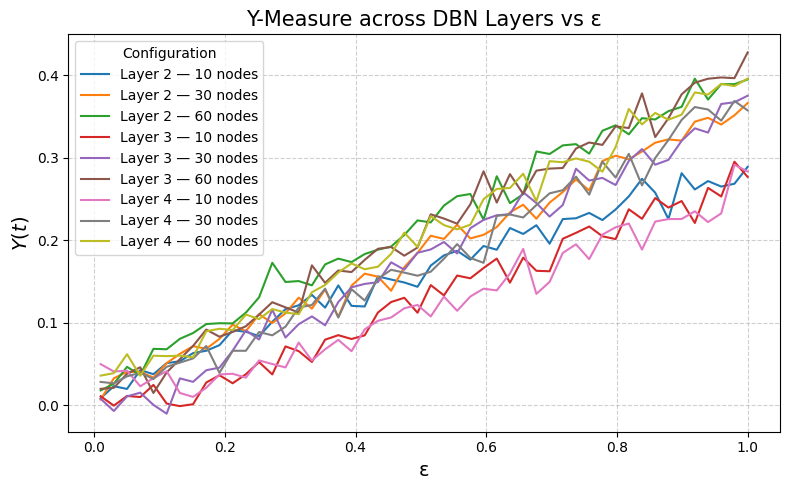

In [77]:
plt.figure(figsize=(8, 5))

# Curvas por capa y número de nodos
plt.plot(eps_values, Y_RN_OS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, Y_RN_OS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, Y_RN_OS_L2_60, label="Layer 2 — 60 nodes")

plt.plot(eps_values, Y_RN_OS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, Y_RN_OS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, Y_RN_OS_L3_60, label="Layer 3 — 60 nodes")

plt.plot(eps_values, Y_RN_OS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, Y_RN_OS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, Y_RN_OS_L4_60, label="Layer 4 — 60 nodes")

# Etiquetas y título
plt.title("Y-Measure across DBN Layers vs ε", fontsize=15)
plt.xlabel("ε", fontsize=14)
plt.ylabel(r"$Y(t)$", fontsize=14)

# Estética
plt.legend(title="Configuration", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### CASE RANDOM NODES, RANDOM SAMPLING --------------------------->

In [78]:
def Y_layer(A_t, sigma_t):
    J = A_t.size
    score = 0.0
    num_pairs = J*(J-1)/2
    for j in range(J):
        for j_prime in range(j+1, J):
            score += (A_t[j]-A_t[j_prime])*(sigma_t[j]-sigma_t[j_prime])
    return score/num_pairs


# CASE ORDER NODES, ORDER SAMPLING --------------------------->
t_star = 4950     
J = 100
eps_values = np.linspace(0.01, 1.0, 50)

Y_RN_RS_L2_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L2_10"], J, eps, func="sigmoid")
    Y_RN_RS_L2_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L2_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L2_30"], J, eps, func="sigmoid")
    Y_RN_RS_L2_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L2_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L2_60"], J, eps, func="sigmoid")
    Y_RN_RS_L2_60.append(Y_layer(A[t_star], Sigma[t_star]))
    
Y_RN_RS_L3_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L3_10"], J, eps, func="sigmoid")
    Y_RN_RS_L3_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L3_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L3_30"], J, eps, func="sigmoid")
    Y_RN_RS_L3_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L3_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L3_60"], J, eps, func="sigmoid")
    Y_RN_RS_L3_60.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L4_10 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L4_10"], J, eps, func="sigmoid")
    Y_RN_RS_L4_10.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L4_30 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L4_30"], J, eps, func="sigmoid")
    Y_RN_RS_L4_30.append(Y_layer(A[t_star], Sigma[t_star]))

Y_RN_RS_L4_60 = []
for eps in eps_values:    
    A, Z, Sigma = simulate_activation_from_data(cut_random["L4_60"], J, eps, func="sigmoid")
    Y_RN_RS_L4_60.append(Y_layer(A[t_star], Sigma[t_star]))

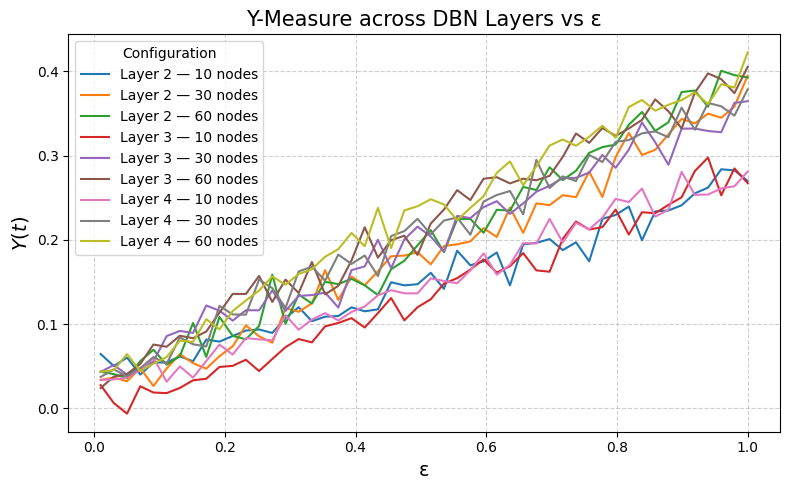

In [79]:
plt.figure(figsize=(8, 5))

# Curvas por capa y número de nodos
plt.plot(eps_values, Y_RN_RS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, Y_RN_RS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, Y_RN_RS_L2_60, label="Layer 2 — 60 nodes")

plt.plot(eps_values, Y_RN_RS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, Y_RN_RS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, Y_RN_RS_L3_60, label="Layer 3 — 60 nodes")

plt.plot(eps_values, Y_RN_RS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, Y_RN_RS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, Y_RN_RS_L4_60, label="Layer 4 — 60 nodes")

# Etiquetas y título
plt.title("Y-Measure across DBN Layers vs ε", fontsize=15)
plt.xlabel("ε", fontsize=14)
plt.ylabel(r"$Y(t)$", fontsize=14)

# Estética
plt.legend(title="Configuration", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## DY/Deps
### ORDER NODES, ORDER SAMPLES

In [96]:
dY_deps_ON_OS_L2_10 = np.gradient(Y_ON_OS_L2_10, eps_values, axis=0)
dY_deps_ON_OS_L2_30 = np.gradient(Y_ON_OS_L2_30, eps_values, axis=0)
dY_deps_ON_OS_L2_60 = np.gradient(Y_ON_OS_L2_60, eps_values, axis=0)

dY_deps_ON_OS_L3_10 = np.gradient(Y_ON_OS_L3_10, eps_values, axis=0)
dY_deps_ON_OS_L3_30 = np.gradient(Y_ON_OS_L3_30, eps_values, axis=0)
dY_deps_ON_OS_L3_60 = np.gradient(Y_ON_OS_L3_60, eps_values, axis=0)

dY_deps_ON_OS_L4_10 = np.gradient(Y_ON_OS_L4_10, eps_values, axis=0)
dY_deps_ON_OS_L4_30 = np.gradient(Y_ON_OS_L4_30, eps_values, axis=0)
dY_deps_ON_OS_L4_60 = np.gradient(Y_ON_OS_L4_60, eps_values, axis=0)


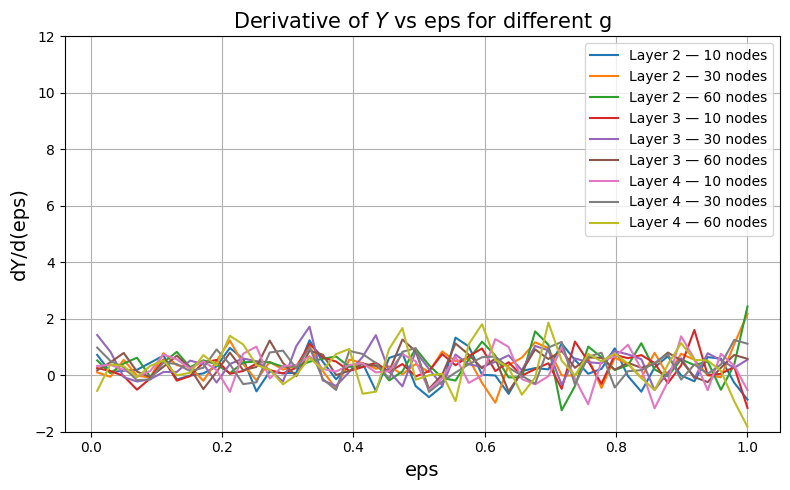

In [104]:
plt.figure(figsize=(8,5))
plt.plot(eps_values, dY_deps_ON_OS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L2_60, label="Layer 2 — 60 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L3_60, label="Layer 3 — 60 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_OS_L4_60, label="Layer 4 — 60 nodes")
plt.xlabel('eps', fontsize=14)
plt.ylabel('dY/d(eps)', fontsize=14)
plt.title('Derivative of $Y$ vs eps for different g', fontsize=15)
plt.legend()
plt.ylim(-2, 12)
plt.grid(True)
plt.tight_layout()
plt.show()

### ORDER NODES, RANDOM SAMPLES

In [106]:
dY_deps_ON_RS_L2_10 = np.gradient(Y_ON_RS_L2_10, eps_values, axis=0)
dY_deps_ON_RS_L2_30 = np.gradient(Y_ON_RS_L2_30, eps_values, axis=0)
dY_deps_ON_RS_L2_60 = np.gradient(Y_ON_RS_L2_60, eps_values, axis=0)

dY_deps_ON_RS_L3_10 = np.gradient(Y_ON_RS_L3_10, eps_values, axis=0)
dY_deps_ON_RS_L3_30 = np.gradient(Y_ON_RS_L3_30, eps_values, axis=0)
dY_deps_ON_RS_L3_60 = np.gradient(Y_ON_RS_L3_60, eps_values, axis=0)

dY_deps_ON_RS_L4_10 = np.gradient(Y_ON_RS_L4_10, eps_values, axis=0)
dY_deps_ON_RS_L4_30 = np.gradient(Y_ON_RS_L4_30, eps_values, axis=0)
dY_deps_ON_RS_L4_60 = np.gradient(Y_ON_RS_L4_60, eps_values, axis=0)


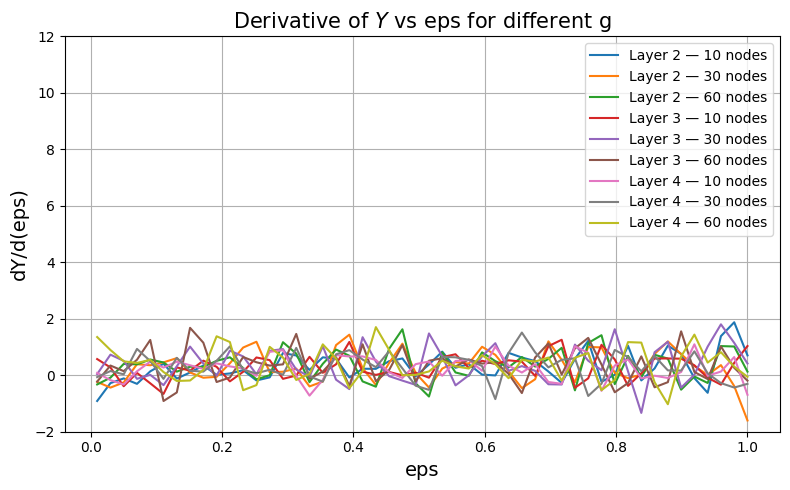

In [108]:
plt.figure(figsize=(8,5))
plt.plot(eps_values, dY_deps_ON_RS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L2_60, label="Layer 2 — 60 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L3_60, label="Layer 3 — 60 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, dY_deps_ON_RS_L4_60, label="Layer 4 — 60 nodes")
plt.xlabel('eps', fontsize=14)
plt.ylabel('dY/d(eps)', fontsize=14)
plt.title('Derivative of $Y$ vs eps for different g', fontsize=15)
plt.legend()
plt.ylim(-2, 12)
plt.grid(True)
plt.tight_layout()
plt.show()

### RANDOM NODES - ORDER SAMPLING

In [109]:
dY_deps_RN_OS_L2_10 = np.gradient(Y_RN_OS_L2_10, eps_values, axis=0)
dY_deps_RN_OS_L2_30 = np.gradient(Y_RN_OS_L2_30, eps_values, axis=0)
dY_deps_RN_OS_L2_60 = np.gradient(Y_RN_OS_L2_60, eps_values, axis=0)

dY_deps_RN_OS_L3_10 = np.gradient(Y_RN_OS_L3_10, eps_values, axis=0)
dY_deps_RN_OS_L3_30 = np.gradient(Y_RN_OS_L3_30, eps_values, axis=0)
dY_deps_RN_OS_L3_60 = np.gradient(Y_RN_OS_L3_60, eps_values, axis=0)

dY_deps_RN_OS_L4_10 = np.gradient(Y_RN_OS_L4_10, eps_values, axis=0)
dY_deps_RN_OS_L4_30 = np.gradient(Y_RN_OS_L4_30, eps_values, axis=0)
dY_deps_RN_OS_L4_60 = np.gradient(Y_RN_OS_L4_60, eps_values, axis=0)

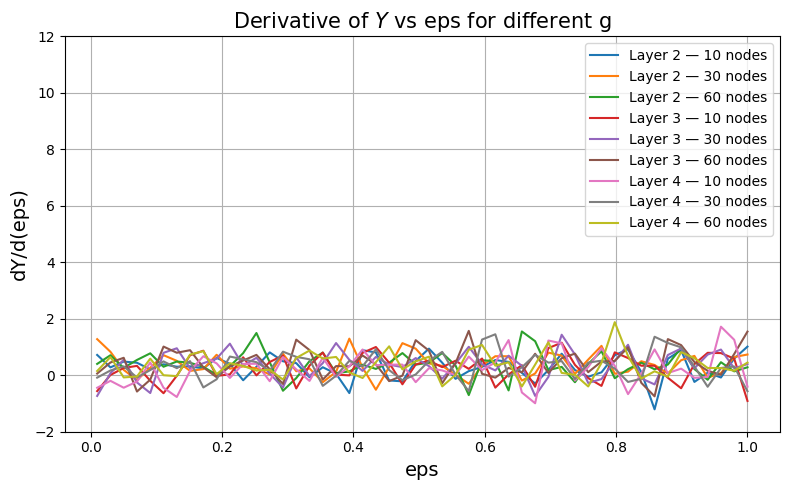

In [110]:
plt.figure(figsize=(8,5))
plt.plot(eps_values, dY_deps_RN_OS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L2_60, label="Layer 2 — 60 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L3_60, label="Layer 3 — 60 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_OS_L4_60, label="Layer 4 — 60 nodes")
plt.xlabel('eps', fontsize=14)
plt.ylabel('dY/d(eps)', fontsize=14)
plt.title('Derivative of $Y$ vs eps for different g', fontsize=15)
plt.legend()
plt.ylim(-2, 12)
plt.grid(True)
plt.tight_layout()
plt.show()

### RANDOM NODES - RANDOM SAMPLING

In [111]:
dY_deps_RN_RS_L2_10 = np.gradient(Y_RN_RS_L2_10, eps_values, axis=0)
dY_deps_RN_RS_L2_30 = np.gradient(Y_RN_RS_L2_30, eps_values, axis=0)
dY_deps_RN_RS_L2_60 = np.gradient(Y_RN_RS_L2_60, eps_values, axis=0)

dY_deps_RN_RS_L3_10 = np.gradient(Y_RN_RS_L3_10, eps_values, axis=0)
dY_deps_RN_RS_L3_30 = np.gradient(Y_RN_RS_L3_30, eps_values, axis=0)
dY_deps_RN_RS_L3_60 = np.gradient(Y_RN_RS_L3_60, eps_values, axis=0)

dY_deps_RN_RS_L4_10 = np.gradient(Y_RN_RS_L4_10, eps_values, axis=0)
dY_deps_RN_RS_L4_30 = np.gradient(Y_RN_RS_L4_30, eps_values, axis=0)
dY_deps_RN_RS_L4_60 = np.gradient(Y_RN_RS_L4_60, eps_values, axis=0)

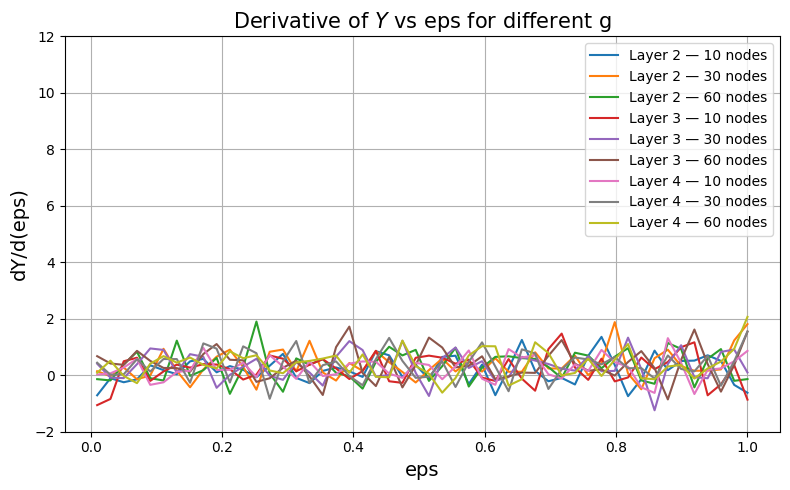

In [112]:
plt.figure(figsize=(8,5))
plt.plot(eps_values, dY_deps_RN_RS_L2_10, label="Layer 2 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L2_30, label="Layer 2 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L2_60, label="Layer 2 — 60 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L3_10, label="Layer 3 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L3_30, label="Layer 3 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L3_60, label="Layer 3 — 60 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L4_10, label="Layer 4 — 10 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L4_30, label="Layer 4 — 30 nodes")
plt.plot(eps_values, dY_deps_RN_RS_L4_60, label="Layer 4 — 60 nodes")
plt.xlabel('eps', fontsize=14)
plt.ylabel('dY/d(eps)', fontsize=14)
plt.title('Derivative of $Y$ vs eps for different g', fontsize=15)
plt.legend()
plt.ylim(-2, 12)
plt.grid(True)
plt.tight_layout()
plt.show()